## Parabolic Equation

Heat equation

$$
\frac{\partial T}{\partial t} = k \nabla^2 T
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML

import imageio

ModuleNotFoundError: No module named 'imageio'

In [ ]:
##### Vectorized forward euler
### Input:  F -> Differential equation;
###         y0 -> list or scalar for initial condition;
###         ts -> list of points in time to evaluate the equation;
###         p -> list or scalar for parameters for F, default is set to 0 if F has no extra parameters;
### Output: ys -> numpy array with all solutions for each step t, ys is a Matrix
##### Gil Miranda - last revision 15/09/2019
def f_euler(F, ts, y0, p = 0):
    ys = [y0]
    h = ts[1]-ts[0]
    for tnext in ts[1:]:
        ynext = ys[-1] + F(tnext, ys[-1], p)*h
        ys.append(ynext)
        t = tnext
    return np.array(ys)

In [2]:
def alpha(x):
    return 0

def beta(x):
    return 0

def m_Tnew(n, i, Ts):
    if i-1 == 0:
        newT = Ts[i] + k * dt/h**2 * (Ts[i+1] - 2*Ts[i] + alpha(i))
    elif i+1 == N+1:
        newT = Ts[i] + k * dt/h**2 * (beta(i) - 2*Ts[i] + Ts[i-1])
    else:
        newT = Ts[i] + k * dt/h**2 * (Ts[i+1] - 2*Ts[i] + Ts[i-1])
    return newT

N = 5
h = 1/(N+1)
dt = 0.1*h**2
tf = 150
ts = np.linspace(0,tf,N+2) # grid de tempo
xs = np.arange(0,1.1,h)
Ts = np.zeros((tf,N+2))  # Matriz de resultados
k = 1
for i in range(1,N+1):
    Ts[0][i] = np.sin(np.pi*h*i) 

for n in range(0,tf-1):
    for i in range(1,N+1):
            Ts[n+1][i] = m_Tnew(n, i, Ts[n])



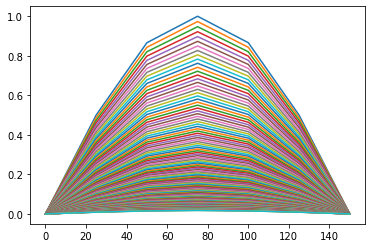

In [3]:
for k in range(0,tf):
    plt.plot(ts, Ts[k])

<IPython.core.display.Javascript object>


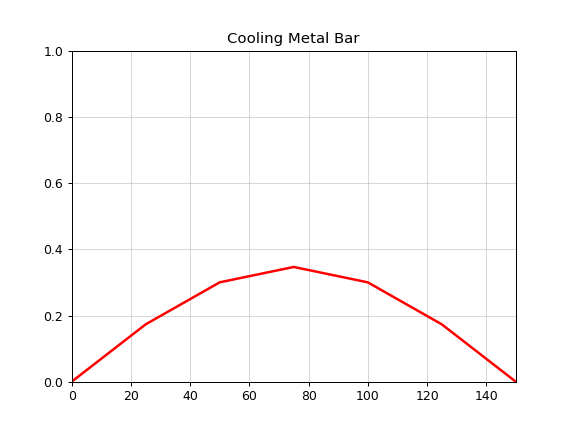

In [4]:
%matplotlib notebook
fig, ax = plt.subplots()
ax.set_xlim((0,150))
ax.set_ylim((0,1))
line, = ax.plot([],[], lw = 2)
def init():
    line.set_data([], [])
    return (line,)


def animate(i):
    x = ts
    y = Ts[i]
    line.set_data(x, y)
    if i > 70:
        line.set_color('blue')
    if i < 70 and i > 40:
        line.set_color('orange')
    if i < 40:
        line.set_color('red')
    return (line,)

anim = animation.FuncAnimation(fig, animate, init_func=init,frames=120, interval=20, blit=True)
anim.save('heat.gif', writer = 'pillow')
# HTML(anim.to_html5_video())
plt.grid(alpha = 0.5)
plt.title('Cooling Metal Bar')
plt.show()